# 4.1 MODEL W ALL FEATURES

# IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model

import missingno as msno

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer, KNNImputer

pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [2]:
import sklearn as sk
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier
from sklearn.svm import SVR


In [4]:
from tqdm import tqdm, trange
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [5]:
df_imputed = pd.read_csv("df_total_demo_dog_park_counts_dec09.csv")

In [6]:
# 2 zipcodes have no park, hence fill them with 0
df_imputed=df_imputed.fillna(0)

In [7]:
# df_imputed=df_imputed.set_index('ZipCode')

In [8]:
df_imputed

,ZipCode,counts,Workers16yearsandover,%16to19years,%20to24years,%25to44years,%45to54years,%55to59years,%60yearsandover,Medianage(years),%Male,%Female,%Onerace,%White,%BlackorAfricanAmerican,%AmericanIndianandAlaskaNative,%Asian,%NativeHawaiianandOtherPacificIslander,%Someotherrace,%Twoormoreraces,%HispanicorLatinoorigin(ofanyrace),"%Whitealone,notHispanicorLatino",%Native,%Foreignborn,%NaturalizedU.S.citizen,...,%Novehicleavailable,%1vehicleavailable,%2vehiclesavailable,%3ormorevehiclesavailable,%Meansoftransportationtowork,%Timeofdeparturetogotowork,%Traveltimetowork,%Vehiclesavailable,rent,income,%college,%employed,householdSize,%family_marriedCouple,%family_children,All_Household,Families,Families_with_children,Families_without_children,population,density,weight,height,park_counts,park_acres
0,10001,1705.0,15725.000,0.011,0.074,0.578,0.182,0.056,0.098,36.300,0.528,0.472,0.949,0.671,0.054,0.000,0.194,0.004,0.026,0.051,0.121,0.605,0.709,0.291,0.162,...,0.810,0.153,0.035,0.002,0.106,0.174,0.139,0.017,2126.073,91733.852,0.068,0.721,13548.000,0.721,0.213,92840.000,122776.000,106452.000,132545.000,21102.000,33959.000,33.727,14.970,7.0,14.117
1,10002,2057.0,31781.000,0.006,0.084,0.541,0.195,0.074,0.100,39.100,0.511,0.489,0.944,0.398,0.065,0.006,0.400,0.000,0.075,0.056,0.202,0.321,0.607,0.393,0.203,...,0.787,0.184,0.020,0.009,0.194,0.256,0.229,0.025,992.176,37159.062,0.086,0.523,33601.000,0.602,0.111,36982.000,40045.000,42054.000,38639.000,81410.000,92573.000,29.423,13.860,28.0,90.192
2,10003,2542.0,32555.000,0.037,0.086,0.573,0.113,0.056,0.136,34.300,0.504,0.496,0.969,0.773,0.024,0.001,0.146,0.001,0.024,0.031,0.073,0.735,0.808,0.192,0.081,...,0.763,0.209,0.020,0.008,0.151,0.243,0.191,0.006,2378.657,118801.115,0.058,0.656,25113.000,0.895,0.225,118161.000,183787.000,250001.000,153480.000,56024.000,97188.000,37.455,15.493,12.0,13.488
3,10004,270.0,2539.000,0.004,0.028,0.553,0.139,0.102,0.174,38.300,0.540,0.460,0.961,0.692,0.057,0.000,0.207,0.005,0.000,0.039,0.062,0.677,0.791,0.209,0.056,...,0.736,0.164,0.086,0.014,0.094,0.221,0.068,0.013,3371.607,187819.598,0.022,0.809,1827.000,0.929,0.292,190223.000,205202.000,244000.000,204130.000,3089.000,5519.000,34.522,14.590,3.0,23.624
4,10005,687.0,7037.000,0.011,0.128,0.707,0.098,0.041,0.016,31.100,0.497,0.503,0.963,0.738,0.023,0.000,0.188,0.000,0.014,0.037,0.056,0.705,0.805,0.195,0.076,...,0.921,0.058,0.022,0.000,0.105,0.196,0.160,0.033,3385.291,195127.366,0.011,0.929,4425.000,0.892,0.391,189702.000,241094.000,250001.000,202042.000,7135.000,97048.000,37.249,15.579,1.0,0.117
5,10006,282.0,2219.000,0.000,0.059,0.754,0.130,0.022,0.035,34.500,0.488,0.512,0.975,0.767,0.070,0.000,0.129,0.000,0.009,0.025,0.092,0.684,0.703,0.297,0.183,...,0.833,0.146,0.022,0.000,0.073,0.108,0.096,0.018,3282.338,188382.108,0.045,0.909,1766.000,0.866,0.391,179044.000,245764.000,250001.000,196500.000,3011.000,32796.000,39.538,15.956,0.0,0.000
6,10007,404.0,4241.000,0.000,0.041,0.554,0.298,0.055,0.052,39.200,0.511,0.489,0.994,0.768,0.058,0.000,0.145,0.000,0.022,0.006,0.114,0.677,0.728,0.272,0.135,...,0.749,0.222,0.029,0.000,0.142,0.223,0.172,0.049,3359.600,228037.479,0.039,0.701,2775.000,0.928,0.430,224063.000,250001.000,250001.000,250001.000,6988.000,42751.000,37.679,15.917,4.0,39.205
7,10009,3793.0,30576.000,0.004,0.094,0.594,0.120,0.092,0.097,34.700,0.484,0.516,0.955,0.713,0.059,0.001,0.117,0.000,0.065,0.045,0.147,0.656,0.764,0.236,0.105,...,0.751,0.211,0.037,0.001,0.135,0.227,0.160,0.010,1724.158,63532.979,0.112,0.614,29671.000,0.604,0.208,63717.000,71135.000,76618.000,68646.000,61347.000,99492.000,33.852,14.818,42.0,20.813
8,10010,2006.0,19665.000,0.014,0.058,0.581,0.189,0.064,0.094,37.700,0.518,0.482,0.979,0.682,0.106,0.000,0.171,0.000,0.020,0.021,0.070,0.627,0.766,0.234,0.141,...,0.672,0.283,0.035,0.010,0.093,0.194,0.123,0.007,2615.447,132197.600,0.064,0.728,16999.000,0.866,0.361,132988.000,229709.000,250001.000,204877.000,31834.000,81487.000,36.086,15.186,4.0,9.821
9,10011,3549.0,32503.000,0.007,0.059,0.516,0.16

# FEATURES

In [15]:
cols = pd.DataFrame(df_imputed.columns)

In [16]:
col_age = ['Workers16yearsandover', 
           '%16to19years',
           '%20to24years',
           '%25to44years',
           '%45to54years',
           '%55to59years',
           '%60yearsandover',
           'Medianage(years)',
          ]   

In [17]:
col_race = ['%Onerace', 
            '%White', 
            '%BlackorAfricanAmerican', 
            '%AmericanIndianandAlaskaNative', 
            '%Asian', 
            '%NativeHawaiianandOtherPacificIslander', 
            '%Someotherrace', 
            '%Twoormoreraces', 
            '%HispanicorLatinoorigin(ofanyrace)', 
            '%Whitealone,notHispanicorLatino',  
            '%Foreignborn']

In [18]:
col_citizenship = ['%NaturalizedU.S.citizen',
                   '%NotaU.S.citizen']

In [19]:
col_language = ['%SpeaklanguageotherthanEnglish',
            '%SpeakEnglish"verywell"',
            '%SpeakEnglishlessthan"verywell"']

In [20]:
col_sex = ['%Male']

In [21]:
col_occupation = ['%Management,business,science,andartsoccupations',
                '%Serviceoccupations',
                '%Salesandofficeoccupations',
                '%Naturalresources,construction,andmaintenanceoccupations',
                '%Production,transportation,andmaterialmovingoccupations',
                '%Militaryspecificoccupations',
                '%Agriculture,forestry,fishingandhunting,andmining',
                '%Construction',
                '%Manufacturing',
                '%Wholesaletrade',
                '%Retailtrade',
                '%Transportationandwarehousing,andutilities',
                '%Informationandfinanceandinsurance,andrealestateandrentalandleasing',
                '%Professional,scientific,management,andadministrativeandwastemanagementservices',
                '%Educationalservices,andhealthcareandsocialassistance',
                '%Arts,entertainment,andrecreation,andaccommodationandfoodservices',
                '%Otherservices(exceptpublicadministration)',
                '%Publicadministration',
                '%Armedforces',
                '%Privatewageandsalaryworkers',
                '%Governmentworkers',
                '%Self-employedworkersinownnotincorporatedbusiness',
                '%Unpaidfamilyworkers']

In [22]:
col_pop = ['population', 'density']

In [23]:
col_worker = ['%employed',
            '%Workers16yearsandoverwithearnings',
           'Workers16yearsandover.1',
            '%Workedinstateofresidence',
            '%Workedincountyofresidence',
            '%Workedoutsidecountyofresidence',
            '%Workedoutsidestateofresidence',
            'Workers16yearsandoverwhodidnotworkfromhome',]

In [24]:
col_timeToWork = ['%12:00a.m.to4:59a.m.',
                    '%5:00a.m.to5:29a.m.',
                    '%5:30a.m.to5:59a.m.',
                    '%6:00a.m.to6:29a.m.',
                    '%6:30a.m.to6:59a.m.',
                    '%7:00a.m.to7:29a.m.',
                    '%7:30a.m.to7:59a.m.',
                    '%8:00a.m.to8:29a.m.',
                    '%8:30a.m.to8:59a.m.',
                    '%9:00a.m.to11:59p.m.',
                    '%Timeofdeparturetogotowork']

In [25]:
col_commuteTime = ['%Lessthan10minutes',
                    '%10to14minutes',
                    '%15to19minutes',
                    '%20to24minutes',
                    '%25to29minutes',
                    '%30to34minutes',
                    '%35to44minutes',
                    '%45to59minutes',
                    '%60ormoreminutes',
                    'Meantraveltimetowork(minutes)',
                    '%Meansoftransportationtowork',
                    '%Traveltimetowork']

In [26]:
col_housing = ['rent',
               '%Owner-occupiedhousingunits',
                '%Renter-occupiedhousingunits']

In [27]:
col_vehicle = ['%Novehicleavailable',
                '%1vehicleavailable',
                '%2vehiclesavailable',
                '%3ormorevehiclesavailable',
                '%Vehiclesavailable']

In [28]:
col_income = ['%$1to$9,999orloss',
            '%$10,000to$14,999',
            '%$15,000to$24,999',
            '%$25,000to$34,999',
            '%$35,000to$49,999',
            '%$50,000to$64,999',
            '%$65,000to$74,999',
            '%$75,000ormore',
            'Medianearnings(dollars)',
             'income']

In [29]:
col_poverty = ['Workers16yearsandoverforwhompovertystatusisdetermined',
                '%Below100percentofthepovertylevel',
                '%100to149percentofthepovertylevel',
                '%Atorabove150percentofthepovertylevel']

In [30]:
col_household = ['Workers16yearsandoverinhouseholds',
                 'householdSize',
                '%family_marriedCouple',
                '%family_children',
                'All_Household',
                'Families',
                'Families_with_children',
                'Families_without_children']

In [31]:
col_college = ['%college']

In [32]:
col_dog=['height','weight']

In [33]:
col_park=['park_counts','park_acres']

In [34]:
# col_age, col_race, col_citizenship, col_language, 
# col_sex, col_occupation, col_pop, col_worker, col_timeToWork,
# col_commuteTime, col_housing, col_vehicle, col_income,
# col_poverty, col_household, col_college

# MODEL

## Variable Assignment

In [35]:
x_col_list=col_household+col_park+col_poverty+col_income+col_housing+col_commuteTime+col_pop+col_race+col_poverty
# x_col_list=sueful_l_from_lasso

In [36]:
col_response=['counts']

In [37]:
random_state=1

In [38]:
x = df_imputed[x_col_list].values
y = df_imputed[col_response].values
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.75, random_state=random_state)

## Linear Regression

### Linear Reg (no regulization)

In [39]:
linreg = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [40]:
linreg_accuracy_val=linreg.score(x_val,y_val)
linreg_accuracy_train=linreg.score(x_train,y_train)

In [41]:
LR_mse=mean_squared_error(y_val, linreg.predict(x_val))

In [42]:
linreg_accuracy_train,linreg_accuracy_val

(0.9228722281251491, 0.5077567056159733)

In [43]:
print('linear reg train score:', linreg_accuracy_train)
print('linear reg val score:', linreg_accuracy_val)
print('mse:',LR_mse)

linear reg train score: 0.9228722281251491
linear reg val score: 0.5077567056159733
mse: 211718.6894502488


### Linear Reg (lasso)

In [44]:
clf = linear_model.Lasso(fit_intercept=True,alpha=0.1)
clf.fit(x_train, y_train)
lasso_linreg_accuracy_train=clf.score(x_train,y_train)
lasso_linreg_accuracy_val=clf.score(x_val,y_val)

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.353e+06, tolerance: 1.169e+04
  model = cd_fast.enet_coordinate_descent(


In [45]:
LLR_mse=mean_squared_error(y_val, clf.predict(x_val))

In [46]:
lasso_linreg_accuracy_train,lasso_linreg_accuracy_val

(0.9192106670605066, 0.5844091692108728)

In [47]:
print('lasso reg train score:', lasso_linreg_accuracy_train)
print('lasso reg val score:', lasso_linreg_accuracy_val)
print('mse:',LLR_mse)

lasso reg train score: 0.9192106670605066
lasso reg val score: 0.5844091692108728
mse: 178749.70984077937


In [48]:
zero_coef_feature=[]
for i in range(len(clf.coef_)):
    if clf.coef_[i] == 0:
        zero_coef_feature.append(x_col_list[i])
zero_coef_feature

['%100to149percentofthepovertylevel',
 '%Atorabove150percentofthepovertylevel',
 '%$15,000to$24,999',
 '%15to19minutes',
 '%25to29minutes',
 '%Onerace',
 '%AmericanIndianandAlaskaNative',
 '%NativeHawaiianandOtherPacificIslander',
 '%Twoormoreraces',
 '%Below100percentofthepovertylevel',
 '%Atorabove150percentofthepovertylevel']

In [49]:
# print(clf.coef_)

In [50]:
useful_feature_list=[item for item in x_col_list if item not in zero_coef_feature]
useful_feature_list

['Workers16yearsandoverinhouseholds',
 'householdSize',
 '%family_marriedCouple',
 '%family_children',
 'All_Household',
 'Families',
 'Families_with_children',
 'Families_without_children',
 'park_counts',
 'park_acres',
 'Workers16yearsandoverforwhompovertystatusisdetermined',
 '%$1to$9,999orloss',
 '%$10,000to$14,999',
 '%$25,000to$34,999',
 '%$35,000to$49,999',
 '%$50,000to$64,999',
 '%$65,000to$74,999',
 '%$75,000ormore',
 'Medianearnings(dollars)',
 'income',
 'rent',
 '%Owner-occupiedhousingunits',
 '%Renter-occupiedhousingunits',
 '%Lessthan10minutes',
 '%10to14minutes',
 '%20to24minutes',
 '%30to34minutes',
 '%35to44minutes',
 '%45to59minutes',
 '%60ormoreminutes',
 'Meantraveltimetowork(minutes)',
 '%Meansoftransportationtowork',
 '%Traveltimetowork',
 'population',
 'density',
 '%White',
 '%BlackorAfricanAmerican',
 '%Asian',
 '%Someotherrace',
 '%HispanicorLatinoorigin(ofanyrace)',
 '%Whitealone,notHispanicorLatino',
 '%Foreignborn',
 'Workers16yearsandoverforwhompovertysta

## Polynomial Regression

- cross validation to determine the best degree

In [51]:

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 5

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(maxdeg):
    
    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(degree=d).fit_transform(x)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_val)

    # Initialize a Linear Regression object with fit_intercept as False
    lreg = LinearRegression(fit_intercept=True)
  
    # Fit model on the training set
    lreg.fit(x_poly_train, y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    # Perform cross-validation on the entire data with 10 folds and 
    # get the MSE scores
    mse_score = cross_validate(lreg, x_poly, y, scoring =('neg_mean_squared_error'),
                        cv=10, return_train_score=True)

    # Compute the mean of the cross validation error and store in list 
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(abs(mse_score['test_score'].mean()))

In [52]:
### edTest(test_best_degree) ###

# Get the best degree associated with the lowest validation error
PL_mse = min(validation_error)
best_degree = validation_error.index(PL_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)


The best degree of the model using validation is 1
The best degree of the model using cross-validation is 1


In [53]:
cross_validation_error

[815139.7164426516,
 252377.18790351244,
 3575135.9081283235,
 70811543.88766943,
 222630947.53650993]

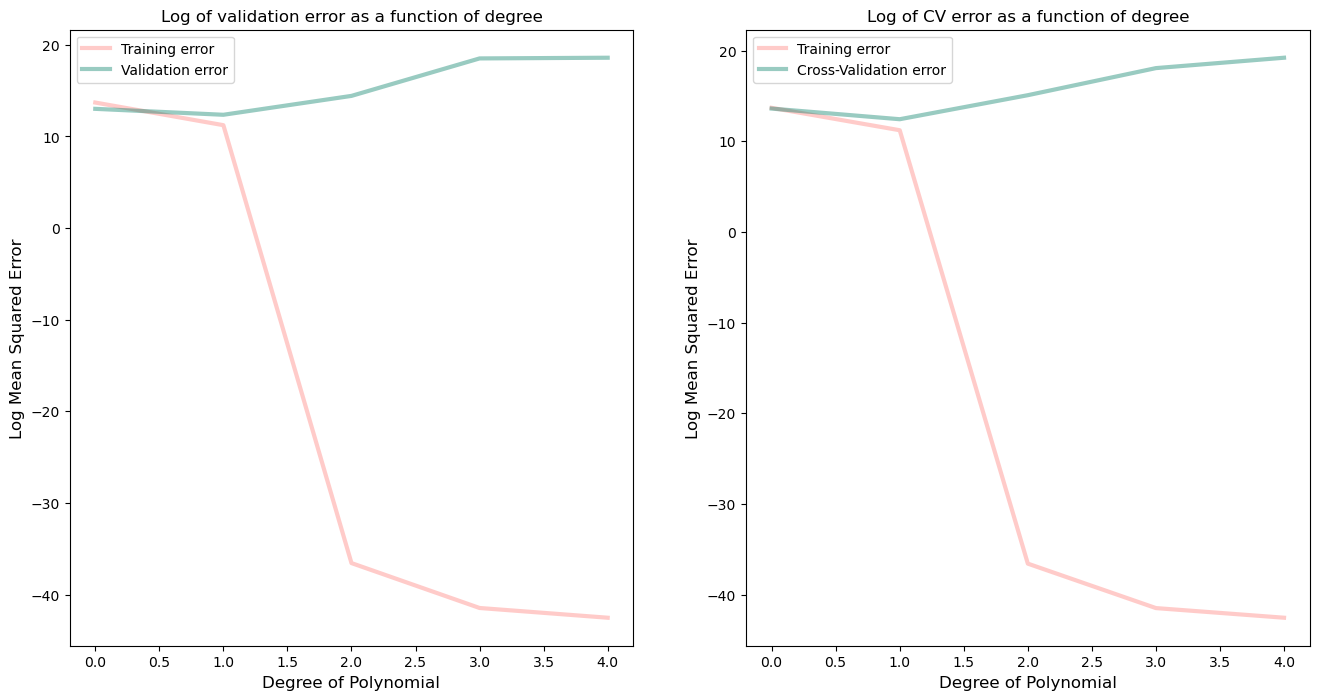

In [54]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();


### polynomial regression using best_degree

In [55]:
# Compute the polynomial features for the train data
x_poly_train = PolynomialFeatures(degree=best_degree).fit_transform(x_train)

# Compute the polynomial features for the validation data
x_poly_val = PolynomialFeatures(degree=best_degree).fit_transform(x_val)

# Initialize a Linear Regression object with fit_intercept as False
lreg_best_d = LinearRegression(fit_intercept=True)

# Fit model on the training set
lreg_best_d.fit(x_poly_train, y_train)

LinearRegression()

In [56]:
polyreg_accuracy_train=lreg_best_d.score(x_poly_train, y_train)
polyreg_accuracy_val=lreg_best_d.score(x_poly_val, y_val)

In [57]:
print('poly reg train score:', polyreg_accuracy_train)
print('poly reg val score:', polyreg_accuracy_val)
print('mse:',LR_mse)

poly reg train score: 0.9153781040658162
poly reg val score: 0.4583457182167624
mse: 211718.6894502488


## Decision Tree
- using GridSearchCrossValidation to select the best max_depth of decision tree, with 5 folds

In [58]:
params = {'max_depth':range(1,21)}

dt=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid = params,
cv=5)

In [59]:
dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 21)})

In [60]:
cv_score = dt.cv_results_['mean_test_score'].max()

In [61]:
dt_accuracy_train=dt.best_estimator_.score(x_train,y_train),
dt_accuracy_val=dt.best_estimator_.score(x_val,y_val)
DT_mse = mean_squared_error(y_val, dt.best_estimator_.predict(x_val))


In [62]:
print('decision tree train score:', dt_accuracy_train)
print('decision tree val score:', dt_accuracy_val)
print('mse:',DT_mse)

decision tree train score: (0.8686010163678135,)
decision tree val score: 0.007710749454473698
mse: 426793.380586244


In [63]:
best_depth = dt.best_params_['max_depth']
print('best_depth:',best_depth)

best_depth: 3


In [64]:
dt.best_estimator_

DecisionTreeRegressor(max_depth=3)

In [65]:
dt.best_estimator_.feature_importances_

array([0.        , 0.39965876, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08849286,
       0.        , 0.        , 0.        , 0.        , 0.02948219,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02419198,
       0.45817421, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

#### feature importance

In [66]:
num_features = 10
model=dt.best_estimator_
importances = model.feature_importances_

In [67]:
order = np.argsort(importances)[-num_features:]
order

array([22, 23, 24, 15, 55, 34, 14,  9,  1, 35])

In [68]:
importances[order]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02419198, 0.02948219, 0.08849286, 0.39965876, 0.45817421])

In [69]:
important_feature_li=[]
l=order.tolist()
for i in l:
    important_feature_li.append(x_col_list[i])
    
important_feature_li

['Medianearnings(dollars)',
 'income',
 'rent',
 '%$10,000to$14,999',
 '%Atorabove150percentofthepovertylevel',
 '%45to59minutes',
 '%$1to$9,999orloss',
 'park_acres',
 'householdSize',
 '%60ormoreminutes']

Text(0.5, 1.0, 'feature importance of DT')

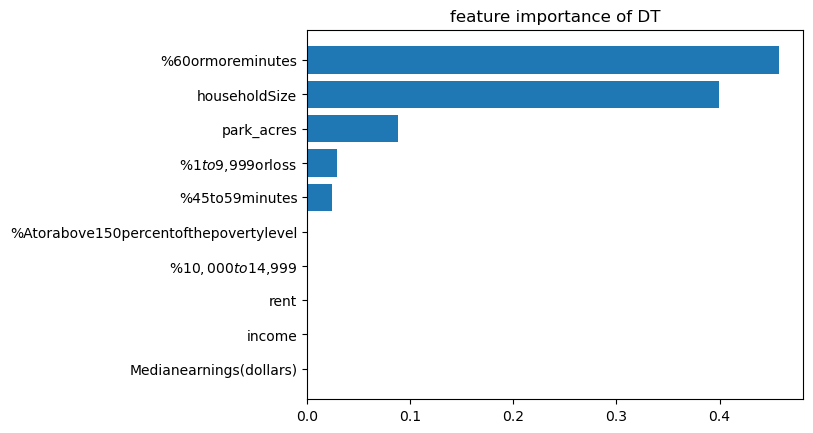

In [70]:
plt.barh(range(num_features), importances[order], tick_label=important_feature_li);
plt.title('feature importance of DT')

## Bagging Regressor

In [71]:
regr = BaggingRegressor(base_estimator=model,n_estimators=500, random_state=0,oob_score=True).fit(x_train, y_train)

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [72]:
bagging_dt_accuracy_train=regr.score(x_train, y_train)
bagging_dt_accuracy_val=regr.score(x_val, y_val)
bagging_dt_accuracy_oob=regr.oob_score_
BG_mse= mean_squared_error(y_val, regr.predict(x_val))

In [73]:
print('bagging train score:', bagging_dt_accuracy_train)
print('bagging val score:', bagging_dt_accuracy_val)
print('bagging oob score:', bagging_dt_accuracy_oob)
print('mse:',BG_mse)

bagging train score: 0.9092007697698075
bagging val score: 0.5368727596230849
bagging oob score: 0.7470614189654677
mse: 199195.58783225273


## Gradient Boosting

In [74]:
params_1 = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [75]:
reg = ensemble.GradientBoostingRegressor(**params_1)
reg.fit(x_train, y_train)

GB_mse = mean_squared_error(y_val, reg.predict(x_val))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
gradient_boosting_accuracy_val=reg.score(x_val, y_val)
gradient_boosting_accuracy_train=reg.score(x_train, y_train)

In [77]:
print('gradient boosting train score:', gradient_boosting_accuracy_train)
print('gradient boosting val score:', gradient_boosting_accuracy_val)
print('mse:',GB_mse)

gradient boosting train score: 0.9998333039298236
gradient boosting val score: 0.6876079553527152
mse: 134362.89542587005


#### train deviance

In [78]:
# test_score = np.zeros((params_1["n_estimators"],), dtype=np.float64)
# for i, y_pred in enumerate(reg.staged_predict(x_val)):
#     test_score[i] = reg.loss_(y_val, y_pred)

# fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
# plt.title("Deviance")
# plt.plot(
#     np.arange(params_1["n_estimators"]) + 1,
#     reg.train_score_,
#     "b-",
#     label="Training Set Deviance",
# )
# plt.plot(
#     np.arange(params_1["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
# )
# plt.legend(loc="upper right")
# plt.xlabel("Boosting Iterations")
# plt.ylabel("Deviance")
# fig.tight_layout()
# plt.show()

In [79]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([ 6, 27, 13,  5, 40, 47, 26, 25, 29, 55, 46, 37,  7, 53, 30, 12, 54,
       11, 33, 20, 19, 18, 48, 36, 44, 31, 28, 15, 24, 16,  2,  4, 14, 41,
       43,  3, 49, 50, 34, 38, 17,  8, 23, 51, 32, 10, 42, 45, 39,  9,  0,
       52, 22, 21, 35,  1])

#### feature importance

In [80]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

important_feature_boosting_li=[]
l=sorted_idx.tolist()
for i in l:
    important_feature_boosting_li.append(x_col_list[i])
    
# important_feature_boosting_li

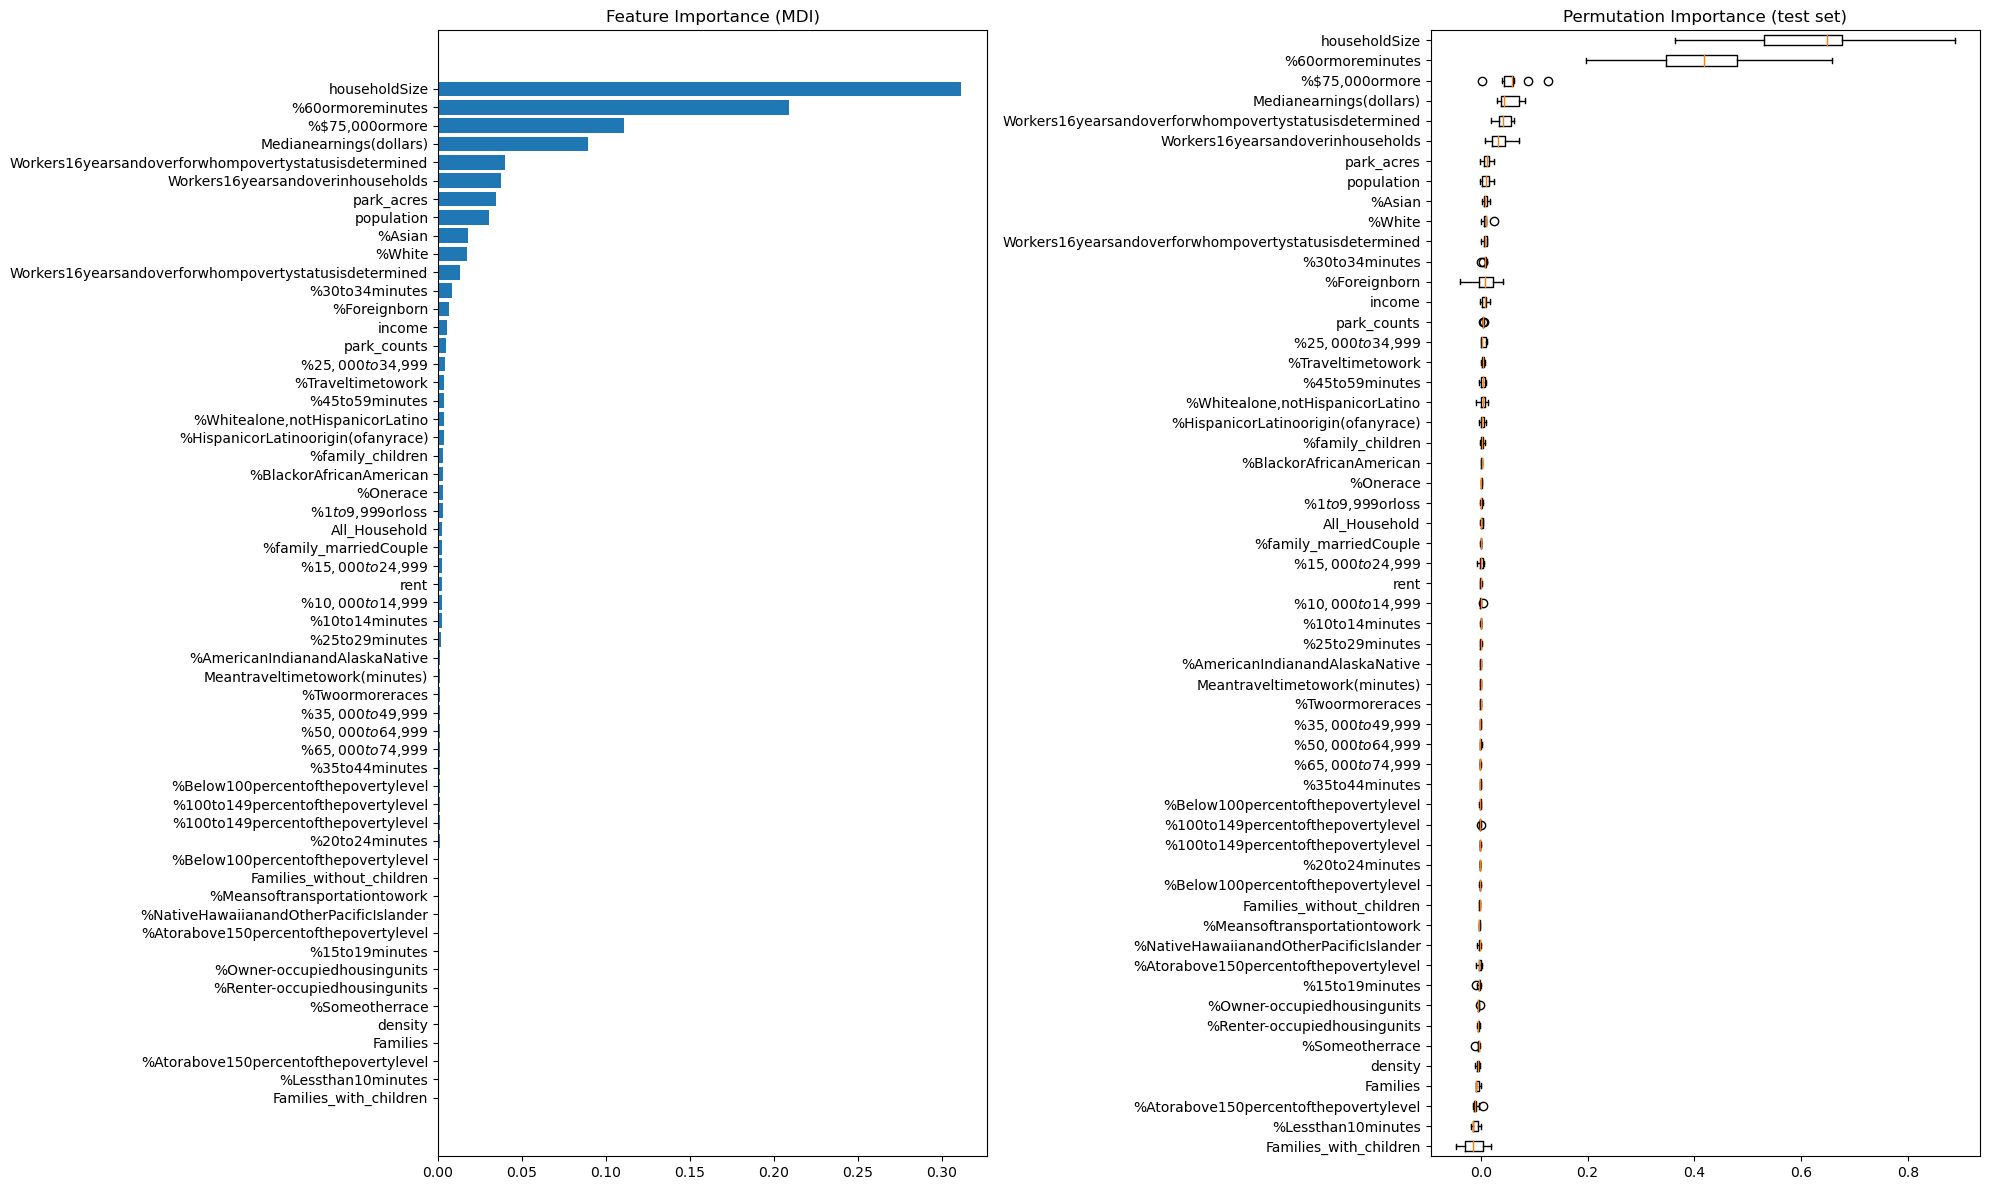

In [81]:

    
# important_feature_boosting_li

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos,important_feature_boosting_li)
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, x_val, y_val, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=important_feature_boosting_li,
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## GradientBoostingRegressor + GridSearchCV

In [82]:
model = GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vecto

Best: 0.790437 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
-0.163631 (0.253316) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-0.163533 (0.253270) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-0.163326 (0.253350) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
-0.158030 (0.252283) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
-0.157256 (0.252213) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
-0.156507 (0.252472) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
-0.150843 (0.251402) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-0.149546 (0.250910) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
-0.148001 (0.251546) with: {'learning_rate'

In [83]:
# save the best parameter as param_op
param_op=params[np.argmax(means)]
param_op

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

### optimal parameters after grid search

In [84]:
reg_op = ensemble.GradientBoostingRegressor(**param_op)
reg_op.fit(x_train, y_train)

GB_mse_op = mean_squared_error(y_val, reg_op.predict(x_val))

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
gradient_boosting_accuracy_val_op=reg_op.score(x_val, y_val),
gradient_boosting_accuracy_train_op=reg_op.score(x_train, y_train)

In [86]:
print('gradient boosting gridsearch cv train score:', gradient_boosting_accuracy_train_op)
print('gradient boosting gridsearch cv val score:', gradient_boosting_accuracy_val_op)
print('mse:',GB_mse_op)

gradient boosting gridsearch cv train score: 0.9999999983081072
gradient boosting gridsearch cv val score: (0.794103715235859,)
mse: 88558.02013004269


### ada boost regressor
- because our dataset size is small and it is not expensive to compute. We nested the optimal regressor as the base_estimator of AdaBoost

In [87]:
adaregr = AdaBoostRegressor(base_estimator=reg_op ,random_state=121,learning_rate=0.1, n_estimators=900)
adaregr.fit(x_train, y_train)

ada_boosting_accuracy_train=adaregr.score(x_train, y_train)
ada_boosting_accuracy_val=adaregr.score(x_val, y_val)
ADA_mse_op = mean_squared_error(y_val, adaregr.predict(x_val))

/Users/yunsongliu/micromamba/envs/cs109a/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
print('ada boost nesting gradient boosting gridsearch cv train score:', ada_boosting_accuracy_train)
print('ada boost nesting gradient boosting gridsearch cv val score:', ada_boosting_accuracy_val)
print('mse:',ADA_mse_op)

ada boost nesting gradient boosting gridsearch cv train score: 0.9998676613817166
ada boost nesting gradient boosting gridsearch cv val score: 0.7637491395282603
mse: 101613.82213070414


## Model Comparison w All Features

In [89]:
results_df=pd.DataFrame([['baseline linear regression w all features',linreg_accuracy_train, linreg_accuracy_val, LR_mse],
                         ['lasso linear regression w all features',lasso_linreg_accuracy_train, lasso_linreg_accuracy_val,LLR_mse],
                         ['Polynomial regression best_degree=1 w all features',polyreg_accuracy_train, polyreg_accuracy_val,PL_mse],
                        ['decision tree with w all features',dt_accuracy_train, dt_accuracy_val,DT_mse],
                         ['bagging with w all features',bagging_dt_accuracy_train,bagging_dt_accuracy_val,BG_mse],
                        ['gradient boost w all features',gradient_boosting_accuracy_train,gradient_boosting_accuracy_val,GB_mse],
                         ['gradient boosting regressor + GridSearchCV w all features',gradient_boosting_accuracy_train_op,gradient_boosting_accuracy_val_op,GB_mse_op],
                        ['ada boost w all features',ada_boosting_accuracy_train,ada_boosting_accuracy_val,ADA_mse_op]])
results_df.columns=['regressor','training accuracy','test accuracy','val MSE']

In [90]:
results_df

,regressor,training accuracy,test accuracy,val MSE
0,baseline linear regression w all features,0.923,0.508,211718.689
1,lasso linear regression w all features,0.919,0.584,178749.710
2,Polynomial regression best_degree=1 w all features,0.915,0.458,232970.842
3,decision tree with w all features,"(0.8686010163678135,)",0.008,426793.381
4,bagging with w all features,0.909,0.537,199195.588
5,gradient boost w all features,1.0,0.688,134362.895
6,gradient boosting regressor + GridSearchCV w all features,1.0,"(0.794103715235859,)",88558.020
7,ada boost w all features,1.0,0.764,101613.822
